In [1]:
#individual Assignment Yichen Wang 260761601
# imports
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('stopwords')
from nltk.corpus import stopwords

# read data as csv
df = pd.read_csv('Train_rev1.csv')
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [2]:
df = df[["FullDescription","SalaryNormalized"]]
df.dropna()
df = df.sample(n=2500)

In [3]:
df

,FullDescription,SalaryNormalized
139026,SYK Recruitment Specialists are looking for a ...,23520
230879,Bright Horizons is currently recruiting for a ...,15000
133255,Our client is an established consultancy with ...,62499
117309,TribePost Ltd are working on behalf of our cli...,30000
119664,Project Administrator Job in County Tyrone / F...,21120
...,...,...
50134,Receptionist (Termtime only) 36 hours per week...,19896
10566,"Our client, a national Facilities Management c...",36000
55728,Business Studies and ICT Teacher Jobs: East Lo...,30000
156665,Registered General Nurse required for a Nursin...,24480


In [4]:
len(df)

2500

In [5]:
thres = df.SalaryNormalized.quantile(0.75)
thres

42500.0

In [6]:
Category = []
for i in df["SalaryNormalized"]:
    if i> thres:
        Category.append(1)
    else:
        Category.append(0)
df["Category"] = Category
df

,FullDescription,SalaryNormalized,Category
139026,SYK Recruitment Specialists are looking for a ...,23520,0
230879,Bright Horizons is currently recruiting for a ...,15000,0
133255,Our client is an established consultancy with ...,62499,1
117309,TribePost Ltd are working on behalf of our cli...,30000,0
119664,Project Administrator Job in County Tyrone / F...,21120,0
...,...,...,...
50134,Receptionist (Termtime only) 36 hours per week...,19896,0
10566,"Our client, a national Facilities Management c...",36000,0
55728,Business Studies and ICT Teacher Jobs: East Lo...,30000,0
156665,Registered General Nurse required for a Nursin...,24480,0


In [7]:
#stop words
stop_words = stopwords.words('english')
stop_words.extend(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',',','.','!',':',';',')','(','*','&','/'])

In [8]:
# tokenize each word/symbols
tokenized = []
for i in df["FullDescription"]:
    text = word_tokenize(i)
    text1=[]
    for j in range(len(text)):
        text1.append(text[j].lower())
    tokenized.append(text1)

In [9]:
# choosing only nouns and adjectives to make it more meaningful
tagged = nltk.pos_tag_sents(tokenized)
words_recorder = []

for i in range(len(tagged)): 
    tag_select = tagged[i]
    temp = []
    for j in range(len(tag_select)):
        label = tag_select[j][1]
        word = tag_select[j][0]
        if label in ['NN', 'JJ', 'JJR', 'JJS', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS']:
            temp.append(word.lower())
    words_recorder.append(temp)

In [10]:
#lemmatization and stopword removal
final =[]
for i in range(len(words_recorder)):
    temp = [word for word in words_recorder[i] if word not in stop_words]
    list_temp=[]
    #lemmatization
    for j in temp:
        temp1 = WordNetLemmatizer().lemmatize(j)
        list_temp.append(temp1)
    final.append(list_temp)

In [11]:
df_clean = []

for i in range(len(final)):
    if df['Category'].iloc[i] == 0:
        df_clean.append([final[i],'low'])
    else:
        df_clean.append([final[i],'high'])

In [12]:
# create a giant list with only words
final_total=[]
for i in final:
    for j in i:
        final_total.append(j)

In [13]:
all_words = nltk.FreqDist(w.lower() for w in final_total)
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [14]:
word_features

['experience',
 'role',
 'team',
 'business',
 'client',
 'service',
 'skill',
 'sale',
 'manager',
 'opportunity',
 'company',
 'management',
 'job',
 'development',
 'candidate',
 'project',
 'customer',
 'excellent',
 'new',
 'application',
 'recruitment',
 'successful',
 'support',
 'work',
 'knowledge',
 'system',
 'uk',
 'ability',
 'level',
 'strong',
 'salary',
 'product',
 'position',
 'environment',
 'year',
 'high',
 'time',
 'also',
 'cv',
 'day',
 'design',
 'good',
 'quality',
 'key',
 'able',
 'technical',
 'training',
 'well',
 'agency',
 'employment',
 'area',
 'requirement',
 'information',
 'engineer',
 'career',
 'essential',
 'communication',
 'full',
 'benefit',
 'responsibility',
 'account',
 'process',
 'part',
 'care',
 'industry',
 'senior',
 'originally',
 'responsible',
 'software',
 'professional',
 'staff',
 'office',
 'solution',
 'market',
 'people',
 'data',
 'vacancy',
 'experienced',
 'standard',
 'consultant',
 'london',
 'group',
 'sector',
 'engine

In [15]:
featuresets = [(document_features(d), c) for (d,c) in df_clean]

# 80% training set & 20% testing set
import random
random.shuffle(featuresets)
train_set, test_set = featuresets[:2000], featuresets[2000:]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [16]:
# Accuracy
print("Accuracy = ",nltk.classify.accuracy(classifier, test_set))

Accuracy =  0.784


In [17]:
test_set_ans = []
for i in test_set:
    test_set_ans.append(i[1])

In [18]:
predict = []
for i in test_set:
    predict.append(classifier.classify(i[0]))

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set_ans,predict)

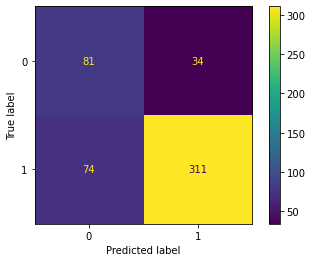

In [20]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
def show_most_informative_features_in_list(classifier, n=10):
    cpdist = classifier._feature_probdist       # probability distribution for feature values given labels
    feature_list = []
    for (fname, fval) in classifier.most_informative_features(n):
        def labelprob(l):
            return cpdist[l, fname].prob(fval)
        labels = sorted([l for l in classifier._labels if fval in cpdist[l, fname].samples()], 
                        key=labelprob)
        feature_list.append([fname, labels[-1]])
    return feature_list

In [22]:
list = show_most_informative_features_in_list(classifier, 50)

In [23]:
import re

top_high=[]
top_low=[]
for i in list:
    if i[1]=="low":
        if len(top_low)<10:
            top_low.append(re.search(r"\(([A-Za-z0-9_]+)\)", i[0]).group(1))
    else:
        if len(top_high)<10:
            top_high.append(re.search(r"\(([A-Za-z0-9_]+)\)", i[0]).group(1))

In [24]:
print("Top ten words that are most indicative of high salary:")
for i in range(len(top_high)):
    print(i+1,": ",top_high[i])

Top ten words that are most indicative of high salary:
1 :  cloud
2 :  presales
3 :  middleware
4 :  aca
5 :  emea
6 :  quantitative
7 :  fx
8 :  domain
9 :  transformation
10 :  institution


In [25]:
print("Top ten words that are most indicative of low salary:")
for i in range(len(top_low)):
    print(i+1,": ",top_low[i])

Top ten words that are most indicative of low salary:
1 :  chef
2 :  trainee
3 :  teacher
4 :  teaching
5 :  classroom
6 :  restaurant
7 :  technician
8 :  secondary
9 :  vehicle
10 :  bar


# Q2. 
How to improve the accuracy?

(1) For this assignment, we are only extracting 2500 samples from the dataset, which may lead to overfitting on a certain random sample. To improve the accuracy, a larger size of dataset could be used.

(2) The stopwords now only includes the common stopwords and number/letters. However, there are still some letter combinations that have no actual meanings. These could be eliminated and cleaned manually if possible to improve the accuracy.

(3) Instead of using naive bayes classifier, other classifiers such as random forests or neural networks could be used to improve accuracy.